In [1]:
import autograd.numpy as np
from autograd import grad, jacobian
import autograd.numpy.random as npr

from matplotlib import pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline

In [2]:
nx = 10
ny = 10

dx = 1. / nx
dy = 1. / ny

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)

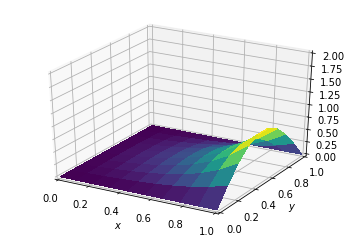

In [3]:
def analytic_solution(x):
    return (1 / (np.exp(np.pi) - np.exp(-np.pi))) * \
    		np.sin(np.pi * x[0]) * (np.exp(np.pi * x[1]) - np.exp(-np.pi * x[1]))
surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])
        
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [4]:
def f(x):
    return 0.

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def A(x):
    return x[1] * np.sin(np.pi * x[0])


def psy_trial(x, net_out):
    return A(x) + x[0] * (1 - x[0]) * x[1] * (1 - x[1]) * net_out


def loss_function(W, x, y):
    loss_sum = 0.
    
    for xi in x:
        for yi in y:
            
            input_point = np.array([xi, yi])
            
            net_out = neural_network(W, input_point)[0]

            net_out_jacobian = jacobian(neural_network_x)(input_point)
            net_out_hessian = jacobian(jacobian(neural_network_x))(input_point)
            
            psy_t = psy_trial(input_point, net_out)
            psy_t_jacobian = jacobian(psy_trial)(input_point, net_out)
            psy_t_hessian = jacobian(jacobian(psy_trial))(input_point, net_out)

            gradient_of_trial_d2x = psy_t_hessian[0][0]
            gradient_of_trial_d2y = psy_t_hessian[1][1]

            func = f(input_point) # right part function

            err_sqr = ((gradient_of_trial_d2x + gradient_of_trial_d2y) - func)**2
            loss_sum += err_sqr
        
    return loss_sum

In [6]:
W = [npr.randn(2, 10), npr.randn(10, 1)]
lmb = 0.001

print(neural_network(W, np.array([1, 1])))

for i in range(100):
    loss_grad =  grad(loss_function)(W, x_space, y_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

[3.90222551]


411.4308487452847
[0.         0.01982551 0.04209132 0.06953812 0.10554432 0.15454188
 0.22256189 0.31797687 0.45253137 0.64278761]
[0.         0.01286634 0.02572398 0.04552088 0.0792148  0.13317115
 0.21277035 0.32226519 0.4648404  0.64278761]


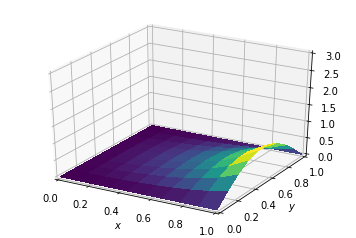

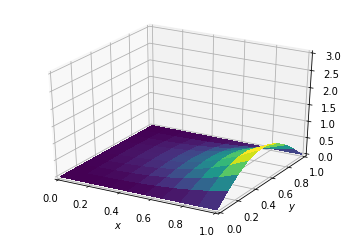

In [8]:
print(loss_function(W, x_space, y_space))

surface2 = np.zeros((ny, nx))
surface = np.zeros((ny, nx))

for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])
        
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        net_outt = neural_network(W, [x, y])[0]
        surface2[i][j] = psy_trial([x, y], net_outt)


print(surface[2])
print(surface2[2])
        
        
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');


fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface2, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 3)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');